# Solve IVPs with diffrax

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from diffrax import Dopri5, ODETerm, PIDController, SaveAt, diffeqsolve

from odezoo import backend, ivps

backend.select("jax")

In [2]:
ivp = ivps.rigid_body()

f, y0, (t0, t1), f_args, *_ = ivp


@jax.jit
def vector_field(_, y, args):
    return f(y, *args)

In [3]:
term = ODETerm(vector_field)
solver = Dopri5()
saveat = SaveAt(ts=jnp.linspace(t0, t1, num=250))
stepsize_controller = PIDController(rtol=1e-5, atol=1e-5)

sol = diffeqsolve(
    term,
    solver,
    t0=t0,
    t1=t1,
    dt0=0.1,
    y0=y0,
    args=f_args,
    saveat=saveat,
    stepsize_controller=stepsize_controller,
)

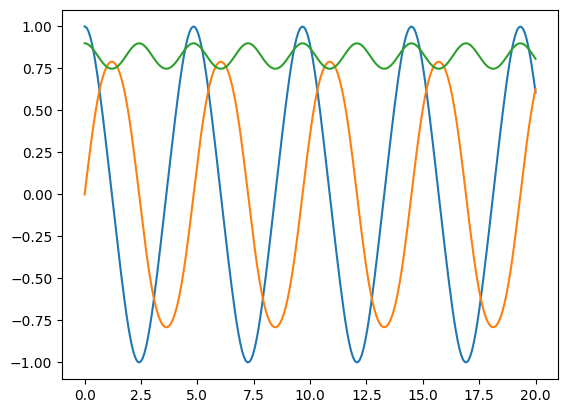

In [4]:
plt.plot(sol.ts, sol.ys)
plt.show()